# pandas

###  Summary Statistics

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import webbrowser
from sklearn.preprocessing import Imputer

In [2]:
web = 'https://github.com/jmportilla/Udemy-notes/blob/master/Lec%2022%20-%20Summary%20Statistics.ipynb'
webbrowser.open(web)

True

In [3]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [4]:
# deal with the missing data

X = dframe1.values
imputer = Imputer(missing_values='NaN',strategy='mean',axis=1)
X = imputer.fit_transform(X)
print(X)
X1 = dframe1.values
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
X1 = imputer.fit_transform(X1)
X1

[[1.  2.  1.5]
 [3.5 3.  4. ]]


array([[1., 2., 4.],
       [1., 3., 4.]])

In [5]:
# Let's see the sum() method in action
print(dframe1.sum(axis = 0))
print(dframe1.sum(axis = 1))

# Can also grab min and max values of dataframe
print(dframe1.min())
print(dframe1.idxmin())

One      1.0
Two      5.0
Three    4.0
dtype: float64
A    3.0
B    7.0
dtype: float64
One      1.0
Two      2.0
Three    4.0
dtype: float64
One      A
Two      A
Three    B
dtype: object


In [6]:
# accumulation sum
dframe1 = DataFrame(np.arange(16).reshape(4,-1),index = list('abcd'),columns=list(range(4)))
print(dframe1)
dframe1.cumsum()

    0   1   2   3
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15


,0,1,2,3
a,0,1,2,3
b,4,6,8,10
c,12,15,18,21
d,24,28,32,36


In [7]:
# summary statistics
dframe1.describe()

,0,1,2,3
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


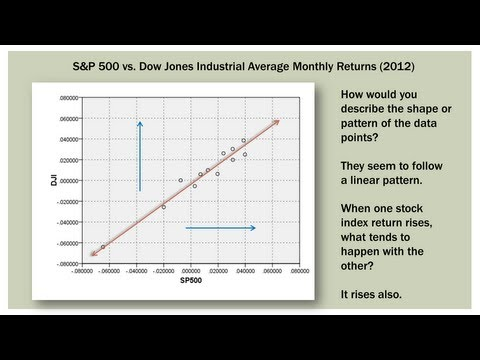

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('xGbpuFNR1ME')

In [9]:
# https://zhuanlan.zhihu.com/p/54453306

import pandas_datareader as pdr
import datetime as dt

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2018, 1, 1)

prices  = pdr.get_data_yahoo(['CVX','XOM','BP'],start = start,end = end)['Adj Close']
prices.head() 

Symbols,BP,CVX,XOM
Date,,,
2014-12-31,29.431612,95.142174,79.858887
2015-01-02,29.431612,95.481415,80.187126
2015-01-05,27.872011,91.664886,77.993080
2015-01-06,27.663549,91.622475,77.578430
2015-01-07,27.733036,91.546143,78.364494


In [10]:
volume = pdr.get_data_yahoo(['CVX','XOM','BP'], 
                               start=start, 
                               end=end)['Volume']
volume.head()

Symbols,BP,CVX,XOM
Date,,,
2014-12-31,6856800.0,6411800.0,11337200.0
2015-01-02,6290100.0,5898800.0,10220400.0
2015-01-05,16126000.0,11758100.0,18502400.0
2015-01-06,11575800.0,11591600.0,16670700.0
2015-01-07,9192400.0,10353800.0,13590700.0


In [15]:
# Lets get the return
rets = prices.pct_change()
print(rets)

corr = rets.corr
corr

Symbols           BP       CVX       XOM
Date                                    
2014-12-31       NaN       NaN       NaN
2015-01-02  0.000000  0.003566  0.004110
2015-01-05 -0.052991 -0.039971 -0.027362
2015-01-06 -0.007479 -0.000463 -0.005316
2015-01-07  0.002512 -0.000833  0.010133
2015-01-08  0.022550  0.022883  0.016645
2015-01-09 -0.004084 -0.019926 -0.001410
2015-01-12 -0.014489 -0.021532 -0.019218
2015-01-13 -0.002497 -0.015867 -0.003653
2015-01-14 -0.008065 -0.002879 -0.002889
2015-01-15  0.001682 -0.011838 -0.008692
2015-01-16  0.059614  0.023863  0.024281
2015-01-20 -0.004491  0.012842 -0.000329
2015-01-21  0.029982  0.015873  0.008563
2015-01-22  0.004122  0.007027  0.010885
2015-01-23 -0.002053 -0.019005 -0.021320
2015-01-26  0.026221  0.018998  0.009572
2015-01-27  0.007265 -0.005694 -0.008827
2015-01-28 -0.033076 -0.042028 -0.032985
2015-01-29 -0.003344 -0.006846 -0.004207
2015-01-30  0.002065 -0.004563 -0.001827
2015-02-02  0.026526  0.034429  0.024708
2015-02-03  0.03

<bound method DataFrame.corr of Symbols           BP       CVX       XOM
Date                                    
2014-12-31       NaN       NaN       NaN
2015-01-02  0.000000  0.003566  0.004110
2015-01-05 -0.052991 -0.039971 -0.027362
2015-01-06 -0.007479 -0.000463 -0.005316
2015-01-07  0.002512 -0.000833  0.010133
2015-01-08  0.022550  0.022883  0.016645
2015-01-09 -0.004084 -0.019926 -0.001410
2015-01-12 -0.014489 -0.021532 -0.019218
2015-01-13 -0.002497 -0.015867 -0.003653
2015-01-14 -0.008065 -0.002879 -0.002889
2015-01-15  0.001682 -0.011838 -0.008692
2015-01-16  0.059614  0.023863  0.024281
2015-01-20 -0.004491  0.012842 -0.000329
2015-01-21  0.029982  0.015873  0.008563
2015-01-22  0.004122  0.007027  0.010885
2015-01-23 -0.002053 -0.019005 -0.021320
2015-01-26  0.026221  0.018998  0.009572
2015-01-27  0.007265 -0.005694 -0.008827
2015-01-28 -0.033076 -0.042028 -0.032985
2015-01-29 -0.003344 -0.006846 -0.004207
2015-01-30  0.002065 -0.004563 -0.001827
2015-02-02  0.026526  0.0

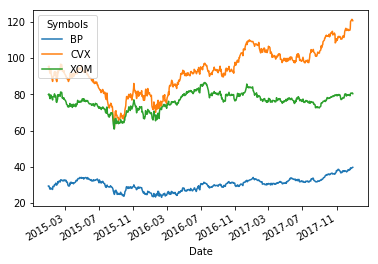

In [16]:
prices.plot()

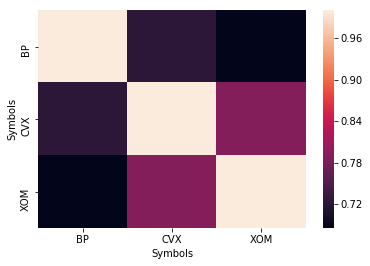

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#As expected pretty strong correlations with eachother
sns.heatmap(rets.corr())

#We'll learn much more about seaborn later!